What this notebook does: 
(1) pull csv files for data in resources folder 
(2) clean up df from csv file
(3) plot data

## Question: Is there a correlation between covid data and (1) the amount of money spent by US residents at grocery stores, liquor stores, and restaurants (census data), and (2) key food-related search terms made in Google?

## Answer:
Covid data shows three main peaks in current number of U.S. citizens hospitalized for covid-19. This data was chosen to reflect the pandemic since covid test results with time has more variability (access to tests, quality and type of tests, tendency for testing bias based on travel/holidays/local gatherings/etc.). These three maxima and the overall trend towards increasing numbers of currently hospitalized were compared to census data and google search trend data.

*A notable increase in food/beverage related store purchases (+ ~36%) and decrease in restaurant/food service places (- ~30%) was observed in the census data (survey of monthly sales data) in mid-March. This feature precedes the first peak in the covid data and most likely corresponds to imposed quarantines. The food/beverage store purchases decrease and restaurant/food service places increase in May then return to baseline-like values (+/- 4% each) in the second half of 2020. This result suggests that grocery and restaurant sales are less impacted by actual covid hospitalization rates. If U.S. regional data were available it could be possible to see if local outbreaks/hospitalizations influenced this data.

*Google search trend data for food/restaurant/food delivery terms (RECIPE, DELIVERY, GROCERY, AND HOURS) indicate similar spikes at the onset of the covid pandemic. However, similar to census data there was no increase in search terms with the second/third covid hospitalization maxima but only an increase at the onset of the pandemic. Interestingly, two distinct spikes are observed periodically in these search terms, except for DELIVERY, for dates close to Thanksgiving and Christmas. Though further analysis is needed to consider this observation, it appears that the baseline for percent search of RECIPE has increased in the U.S. since the pandemic began in early March.  

Census data source:

https://www.census.gov/econ/currentdata/dbsearch?program=MRTS&startYear=2017&endYear=2021&categories=4451&dataType=SM&geoLevel=US&adjusted=1&notAdjusted=1&submit=GET+DATA&releaseScheduleId=

Google Trends source:

https://trends.google.com/trends/?geo=US

https://support.google.com/trends/answer/4365533?hl=en

U.S. Covid data source:

https://covidtracking.com/data/download


In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import os
import matplotlib.ticker as ticker

In [2]:
# Read in covid data
covid_1 = pd.read_csv('Resources/covid/national-history.csv')

# delete NaN values and reset index
covid = covid_1.dropna().reset_index(drop=True)

# convert dates, sort, reset data to help find max values later
covid['date'] =pd.to_datetime(covid.date)
covid = covid.sort_values(by=['date']).reset_index(drop=True)

# check length and data types of dataframe
print('------------------------------------------------')
print(f'Number of rows is {len(covid.index)}')
print('------------------------------------------------')
covid.info()
print('------------------------------------------------')

# pull date range
min_date = covid['date'].min()
max_date = covid['date'].max()
print('------------------------------------------------')
print(f'The date ranges from {min_date} to {max_date}.')
print('------------------------------------------------')

# determine local maxima and corresponding date
max_1 = covid.loc[0:99, 'hospitalizedCurrently'].max()
date_max_1 = covid.loc[covid['hospitalizedCurrently'] == max_1, 'date']
print(f'First max hospitalization was {max_1} hospitalized on index/date: {date_max_1}')
print('------------------------------------------------')
max_2 = covid.loc[100:199, 'hospitalizedCurrently'].max()
date_max_2 = covid.loc[covid['hospitalizedCurrently'] == max_2, 'date']
print (f'Second max hospitalization was {max_2} hospitalized on index/date: {date_max_2}')
print('------------------------------------------------')
max_3 = covid.loc[200:290, 'hospitalizedCurrently'].max()
date_max_3 = covid.loc[covid['hospitalizedCurrently'] == max_3, 'date']
print(f'Third max hospitalization was {max_3} hospitalized on index/date: {date_max_3}')
print('------------------------------------------------')

# look at headings
covid.head(10)


------------------------------------------------
Number of rows is 290
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      290 non-null    datetime64[ns]
 1   death                     290 non-null    float64       
 2   deathIncrease             290 non-null    int64         
 3   inIcuCumulative           290 non-null    float64       
 4   inIcuCurrently            290 non-null    float64       
 5   hospitalizedIncrease      290 non-null    int64         
 6   hospitalizedCurrently     290 non-null    float64       
 7   hospitalizedCumulative    290 non-null    float64       
 8   negative                  290 non-null    float64       
 9   negativeIncrease          290 non-null    int64         
 10  onVentilatorCumulative    

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2020-04-01,5336.0,1006,256.0,3937.0,4148,20906.0,27930.0,1028082.0,87552,32.0,561.0,223119.0,26271,56,1300869,119541
1,2020-04-02,6511.0,1175,305.0,4513.0,4164,22995.0,32094.0,1125231.0,97149,32.0,576.0,251182.0,28063,56,1427708,126839
2,2020-04-03,7798.0,1287,335.0,4928.0,4621,25723.0,36715.0,1230614.0,105383,39.0,623.0,283072.0,31890,56,1567434,139726
3,2020-04-04,9276.0,1478,403.0,5500.0,4993,30456.0,41708.0,1428863.0,198249,39.0,656.0,316130.0,33058,56,1799831,232397
4,2020-04-05,10618.0,1342,609.0,5811.0,3953,32180.0,45661.0,1518205.0,89342,39.0,650.0,342040.0,25910,56,1922157,122326
5,2020-04-06,11932.0,1314,663.0,7079.0,2962,36159.0,48623.0,1634290.0,116085,39.0,2961.0,370283.0,28243,56,2060620,138463
6,2020-04-07,13970.0,2038,738.0,9978.0,2931,43849.0,51554.0,1763455.0,129165,43.0,4047.0,400759.0,30476,56,2226071,165451
7,2020-04-08,15973.0,2003,862.0,10276.0,4387,45359.0,55941.0,1885410.0,121955,39.0,4142.0,431718.0,30959,56,2389599,163528
8,2020-04-09,18024.0,2051,918.0,12445.0,3829,51323.0,59770.0,2025697.0,140287,39.0,5798.0,466834.0,35116,56,2564727,175128
9,2020-04-10,20107.0,2083,1179.0,12693.0,4911,53167.0,64681.0,2145322.0,119625,39.0,5937.0,500442.0,33608,56,2723715,158988


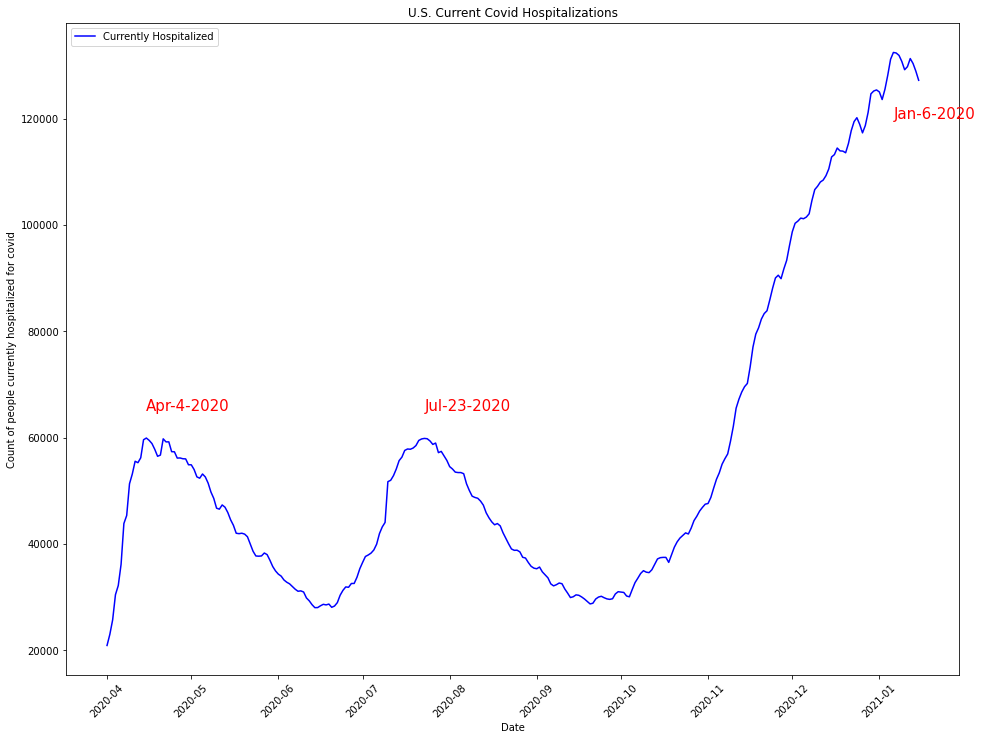

In [3]:
# plot covid data

# define variables
date = covid['date']
hospitalized = covid['hospitalizedCurrently']

# define plot and axis settings 
f = plt.figure() 
ax = plt.axes()

# plot figure
hospitalized_handle = plt.plot(date, hospitalized, color='b', label='Currently Hospitalized')

# rotate tick marks
plt.xticks(rotation=45)

# readjust figure size
f.set_figwidth(16) 
f.set_figheight(12)

# label plot
plt.xlabel("Date")
plt.title("U.S. Current Covid Hospitalizations")
plt.ylabel("Count of people currently hospitalized for covid")

# label maxima
plt.annotate('Apr-4-2020',(date_max_1,65000),fontsize=15,color="red")
plt.annotate('Jul-23-2020',(date_max_2,65000),fontsize=15,color="red")
plt.annotate('Jan-6-2020',(date_max_3,120000),fontsize=15,color="red")

# add legend
plt.legend(loc="upper left")

# save plot as .png
plt.savefig("Resources/plot_pngs/us_current_hospitalization.png")

# show plot in notebook
plt.show()


Covid hospitalization data shows three distinct peaks since the onset of the pandemic: mid April 2020, late July 2020, and late Dec 2020/early Jan 2020.

## Census Reports on  Grocery, Food and Beverage, and Beer, Wine, and Liquor Sales

*census data is available for each month (up to Nov. 2020)
*some data is seasonally adjusted (Restaurants and other dining places & Supermarkets and other Grocery are not adjusted)
*data types are millions of dollars in sales and percentage change by month

In [4]:
# get the names of all census csv files in the folder
for file in os.listdir("Resources/census"):
    if file.endswith(".csv"):
        print(os.path.join("/Resources/census", file))

/Resources/census\SeriesReport-Beer Wine and Liquor Stores.csv
/Resources/census\SeriesReport-Beer Wine and Liquor Stores_percent change.csv
/Resources/census\SeriesReport-Food and Beverage Stores.csv
/Resources/census\SeriesReport-Food and Beverage Stores_percent change.csv
/Resources/census\SeriesReport-Food Service and Drinking Places percentage.csv
/Resources/census\SeriesReport-Food Services and Drinking Places.csv
/Resources/census\SeriesReport-Grocery Stores.csv
/Resources/census\SeriesReport-Grocery Stores_percent change.csv
/Resources/census\SeriesReport-Restaurants and other dining places percentage.csv
/Resources/census\SeriesReport-Restaurants and other dining places.csv
/Resources/census\SeriesReport-Supermarkets and Other Grocery.csv
/Resources/census\SeriesReport-Supermarkets and Other Grocery_percent change.csv


In [5]:
# read in csvs and get rid of commas in thousands place
census_bwl = pd.read_csv('Resources/census/SeriesReport-Beer Wine and Liquor Stores.csv', thousands=',')
census_bwl_percentage = pd.read_csv('Resources/census/SeriesReport-Beer Wine and Liquor Stores_percent change.csv')
census_food_bev = pd.read_csv('Resources/census/SeriesReport-Food and Beverage Stores.csv', thousands=',')
census_food_bev_percentage = pd.read_csv('Resources/census/SeriesReport-Food and Beverage Stores_percent change.csv')
census_food_service = pd.read_csv('Resources/census/SeriesReport-Food Services and Drinking Places.csv', thousands=',')
census_food_service_percentage = pd.read_csv('Resources/census/SeriesReport-Food Service and Drinking Places percentage.csv')
census_grocery = pd.read_csv('Resources/census/SeriesReport-Grocery Stores.csv', thousands=',')
census_grocery_percentage = pd.read_csv('Resources/census/SeriesReport-Grocery Stores_percent change.csv')
census_restaurant = pd.read_csv('Resources/census/SeriesReport-Restaurants and other dining places.csv', thousands=',')
census_restaurant_percentage = pd.read_csv('Resources/census/SeriesReport-Restaurants and other dining places percentage.csv')
census_supermarket = pd.read_csv('Resources/census/SeriesReport-Supermarkets and Other Grocery.csv', thousands=',')
census_supermarket_percentage = pd.read_csv('Resources/census/SeriesReport-Supermarkets and Other Grocery_percent change.csv')

# dataframe cleanup

# rename column headings
census_bwl.columns = census_bwl.iloc[6]
census_bwl_percentage.columns = census_bwl_percentage.iloc[6] 
census_food_bev.columns = census_food_bev.iloc[6]
census_food_bev_percentage.columns = census_food_bev_percentage.iloc[6]
census_food_service.columns = census_food_service.iloc[6]
census_food_service_percentage.columns = census_food_service_percentage.iloc[6]
census_grocery.columns = census_grocery.iloc[6]
census_grocery_percentage.columns = census_grocery_percentage.iloc[6]
census_restaurant.columns = census_restaurant.iloc[6]
census_restaurant_percentage.columns = census_restaurant_percentage.iloc[6]
census_supermarket.columns = census_supermarket.iloc[6]
census_supermarket_percentage.columns = census_supermarket_percentage.iloc[6]


# delete old census heading
census_bwl_clean = census_bwl.drop([0, 1, 2, 3, 4, 5, 6])
census_bwl_percentage_clean = census_bwl_percentage.drop([0, 1, 2, 3, 4, 5, 6])
census_food_bev_clean = census_food_bev.drop([0, 1, 2, 3, 4, 5, 6])
census_food_bev_percentage_clean = census_food_bev_percentage.drop([0, 1, 2, 3, 4, 5, 6])
census_food_service_clean = census_food_service.drop([0, 1, 2, 3, 4, 5, 6])
census_food_service_percentage_clean = census_food_service_percentage.drop([0, 1, 2, 3, 4, 5, 6])
census_grocery_clean = census_grocery.drop([0, 1, 2, 3, 4, 5, 6])
census_grocery_percentage_clean = census_grocery_percentage.drop([0, 1, 2, 3, 4, 5, 6])
census_restaurant_clean = census_restaurant.drop([0, 1, 2, 3, 4, 5, 6])
census_restaurant_percentage_clean = census_restaurant_percentage.drop([0, 1, 2, 3, 4, 5, 6])
census_supermarket_clean = census_supermarket.drop([0, 1, 2, 3, 4, 5, 6])
census_supermarket_percentage_clean = census_supermarket_percentage.drop([0, 1, 2, 3, 4, 5, 6])

# drop NaN values
census_bwl_clean = census_bwl_clean[census_bwl_clean['Value'].notna()]
census_bwl_percentage_clean = census_bwl_percentage_clean[census_bwl_percentage_clean['Value'].notna()]
census_food_bev_clean = census_food_bev_clean[census_food_bev_clean['Value'].notna()]
census_food_bev_percentage_clean = census_food_bev_percentage_clean[census_food_bev_percentage_clean['Value'].notna()]
census_food_service_clean = census_food_service_clean[census_food_service_clean['Value'].notna()]
census_food_service_percentage_clean = census_food_service_percentage_clean[census_food_service_percentage_clean['Value'].notna()]
census_grocery_clean = census_grocery_clean[census_grocery_clean['Value'].notna()]
census_grocery_percentage_clean = census_grocery_percentage_clean[census_grocery_percentage_clean['Value'].notna()]
census_restaurant_clean = census_restaurant_clean[census_restaurant_clean['Value'].notna()]
census_restaurant_percentage_clean = census_restaurant_percentage_clean[census_restaurant_percentage_clean['Value'].notna()]
census_supermarket_clean = census_supermarket_clean[census_supermarket_clean['Value'].notna()]
census_supermarket_percentage_clean = census_supermarket_percentage_clean[census_supermarket_percentage_clean['Value'].notna()]


# merge datasets to put on single plot
# total sales
merged_value_1 = census_bwl_clean
merged_value_2 = census_food_bev_clean.merge(census_food_service_clean, left_on='Period', right_on='Period')
merged_value_3 = census_grocery_clean
merged_value_4 = census_restaurant_clean.merge(census_supermarket_clean, left_on='Period', right_on='Period' )
merged_value_5 = merged_value_1.merge(merged_value_2, left_on='Period', right_on='Period')
merged_value_6 = merged_value_3.merge(merged_value_4, left_on='Period', right_on='Period')
merged_value = merged_value_5.merge(merged_value_6, left_on='Period', right_on='Period')

# monthly percentage
merged_percentage_1 = census_bwl_percentage_clean
merged_percentage_2 = census_food_bev_percentage_clean.merge(census_food_service_percentage_clean, left_on='Period', right_on='Period')
merged_percentage_3 = census_grocery_percentage_clean
merged_percentage_4 = census_restaurant_percentage_clean.merge(census_supermarket_percentage_clean, left_on='Period', right_on='Period' )
merged_percentage_5 = merged_percentage_1.merge(merged_percentage_2, left_on='Period', right_on='Period')
merged_percentage_6 = merged_percentage_3.merge(merged_percentage_4, left_on='Period', right_on='Period')
merged_percentage = merged_percentage_5.merge(merged_percentage_6, left_on='Period', right_on='Period')

# clean up merged dataframes
# drop NaN columns
cols_of_interest = ['Period', 'Value_x','Value_x_x', 'Value_y_x', 'Value_y', 'Value_x_y', 
                   'Value_y_y']
merged_value = merged_value[cols_of_interest]
merged_percentage = merged_percentage[cols_of_interest]

# rename columns
merged_value.rename(columns={'Value_x':'Beer Wine and Liquor Stores', 
                             'Value_x_x': 'Food and Beverage Stores', 'Value_y_x': 'Food Service and Drinking Places',
                             'Value_y': 'Grocery Stores', 'Value_x_y':'Restaurants and other dining places',
                             'Value_y_y': 'Supermarkets and Other Grocery'}, inplace=True)
merged_percentage.rename(columns={'Value_x':'Beer Wine and Liquor Stores', 
                             'Value_x_x': 'Food and Beverage Stores', 'Value_y_x': 'Food Service and Drinking Places',
                             'Value_y': 'Grocery Stores', 'Value_x_y':'Restaurants and other dining places',
                             'Value_y_y': 'Supermarkets and Other Grocery'}, inplace=True)

# remove commas and change data type
merged_value['Beer Wine and Liquor Stores'] = merged_value['Beer Wine and Liquor Stores'].str.replace(',', '').astype(float)
merged_value['Food and Beverage Stores'] = merged_value['Food and Beverage Stores'].str.replace(',', '').astype(float)
merged_value['Food Service and Drinking Places'] = merged_value['Food Service and Drinking Places'].str.replace(',', '').astype(float)
merged_value['Grocery Stores'] = merged_value['Grocery Stores'].str.replace(',', '').astype(float)
merged_value['Restaurants and other dining places'] = merged_value['Restaurants and other dining places'].str.replace(',', '').astype(float)
merged_value['Supermarkets and Other Grocery'] = merged_value['Supermarkets and Other Grocery'].str.replace(',', '').astype(float)

# change data type
merged_percentage['Beer Wine and Liquor Stores'] = merged_percentage['Beer Wine and Liquor Stores'].astype(float)
merged_percentage['Food and Beverage Stores'] = merged_percentage['Food and Beverage Stores'].astype(float)
merged_percentage['Food Service and Drinking Places'] = merged_percentage['Food Service and Drinking Places'].astype(float)
merged_percentage['Grocery Stores'] = merged_percentage['Grocery Stores'].astype(float)
merged_percentage['Restaurants and other dining places'] = merged_percentage['Restaurants and other dining places'].astype(float)
merged_percentage['Supermarkets and Other Grocery'] = merged_percentage['Supermarkets and Other Grocery'].astype(float)


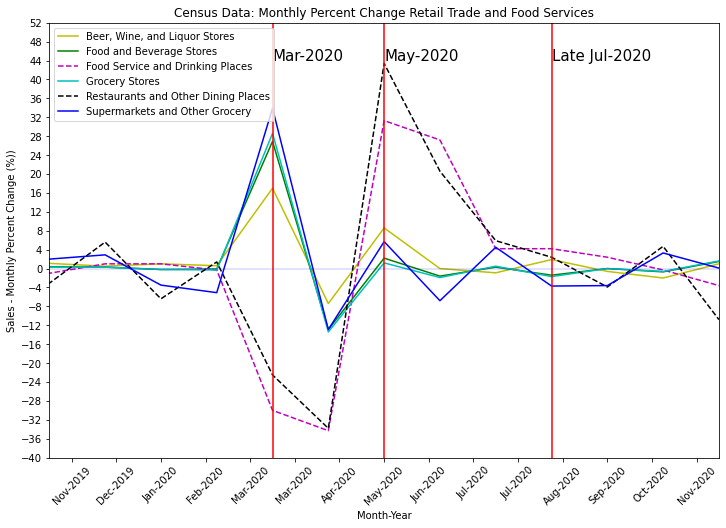

In [6]:
# plot of percent monthly change data

# set variables from dataframe
period_percent = merged_percentage['Period']
bwl_percent = merged_percentage['Beer Wine and Liquor Stores']
fb_percent = merged_percentage['Food and Beverage Stores']
fsd_percent = merged_percentage['Food Service and Drinking Places']
gs_percent = merged_percentage['Grocery Stores']
rod_percent = merged_percentage['Restaurants and other dining places']
sog_percent = merged_percentage['Supermarkets and Other Grocery']

# define figure and axes for adjustments
f = plt.figure() 
ax = plt.axes()

# plot and set line colors and types
bwl_percent_handle = plt.plot(period_percent, bwl_percent, 'y', label='Beer, Wine, and Liquor Stores')
fb_percent_handle = plt.plot(period_percent, fb_percent, 'g', label='Food and Beverage Stores')
fsd_percent_handle = plt.plot(period_percent, fsd_percent, 'm--', label='Food Service and Drinking Places')
gs_percent_handle = plt.plot(period_percent, gs_percent, 'c', label='Grocery Stores')
rod_percent_handle = plt.plot(period_percent, rod_percent, 'k--', label='Restaurants and Other Dining Places')
sog_percent_handle = plt.plot(period_percent, sog_percent, 'b', label='Supermarkets and Other Grocery')

# adjust tick marks so they are visible by rotating and only adding ~half of the total tick marks
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(25))

# add labels
plt.xlabel("Month-Year")
plt.title("Census Data: Monthly Percent Change Retail Trade and Food Services")
plt.ylabel("Sales - Monthly Percent Change (%))")

# adjust figure size
f.set_figwidth(12) 
f.set_figheight(8)

# add vertical lines at critical points and secondary hospitalization increase (late July)
ax.axvline('Mar-2020', color='red')
ax.axvline('May-2020', color='red')
ax.axvline('Aug-2020', color='red')

# add horizontal line at zero as guide for eye
ax.axhline(0, color='b',alpha=0.15)

# annotate vertical line
plt.annotate('Mar-2020',('Mar-2020',44),fontsize=15,color="black")
plt.annotate('May-2020',('May-2020',44),fontsize=15,color="black")
plt.annotate('Late Jul-2020',('Aug-2020',44),fontsize=15,color="black")

# add legend
plt.legend(loc="upper left")


# adjust axes
plt.xlim(['Nov-2019', 'Nov-2020'])
plt.ylim([-40, 52])

# save plt as .png
plt.savefig("Resources/plot_pngs/census_percentage.png")

# show plot in notebook
plt.show()



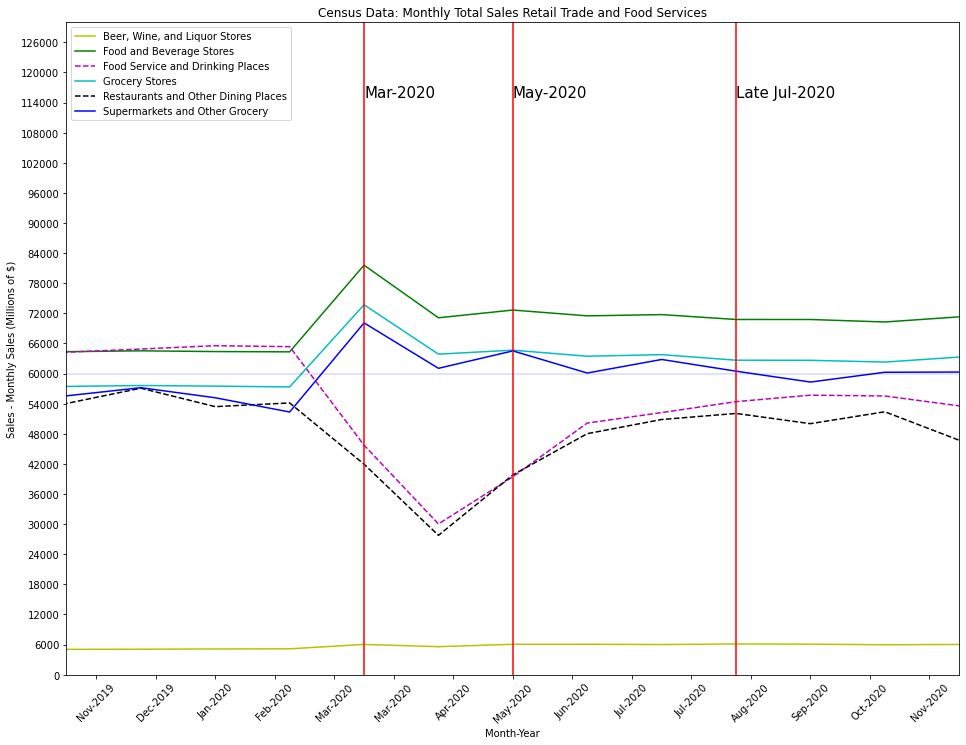

In [7]:
# plot of total sales data

# define variables
period = merged_value['Period']
bwl = merged_value['Beer Wine and Liquor Stores']
fb = merged_value['Food and Beverage Stores']
fsd = merged_value['Food Service and Drinking Places']
gs = merged_value['Grocery Stores']
rod = merged_value['Restaurants and other dining places']
sog = merged_value['Supermarkets and Other Grocery']

# define figure and axes for adjustments
f = plt.figure() 
ax = plt.axes()

# plot and set line colors and types
bwl_handle = plt.plot(period, bwl, 'y', label='Beer, Wine, and Liquor Stores')
fb_handle = plt.plot(period, fb, 'g', label='Food and Beverage Stores')
fsd_handle = plt.plot(period, fsd, 'm--', label='Food Service and Drinking Places')
gs_handle = plt.plot(period, gs, 'c', label='Grocery Stores')
rod_handle = plt.plot(period, rod, 'k--', label='Restaurants and Other Dining Places')
sog_handle = plt.plot(period, sog, 'b', label='Supermarkets and Other Grocery')


# adjust tick marks so they are visible by rotating and only adding ~half of the total tick marks
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(25))

# add labels
plt.xlabel("Month-Year")
plt.title("Census Data: Monthly Total Sales Retail Trade and Food Services")
plt.ylabel("Sales - Monthly Sales (Millions of $)")

# adjust figure size
f.set_figwidth(16) 
f.set_figheight(12)

# add vertical lines at critical points and secondary hospitalization increase (late July)
ax.axvline('Mar-2020', color='red')
ax.axvline('May-2020', color='red')
ax.axvline('Aug-2020', color='red')

# add horizontal line at 60000 as guide for eye
ax.axhline(60000, color='b',alpha=0.15)

# annotate vertical line
plt.annotate('Mar-2020',('Mar-2020',115000),fontsize=15,color="black")
plt.annotate('May-2020',('May-2020',115000),fontsize=15,color="black")
plt.annotate('Late Jul-2020',('Aug-2020',115000),fontsize=15,color="black")

# add legend
plt.legend(loc="upper left")

# adjust axes
plt.xlim(['Nov-2019', 'Nov-2020'])
plt.ylim([0, 130000])

# save plt as .png
plt.savefig("Resources/plot_pngs/census_value.png")

# show plot
plt.show()


## Google trend data for search terms RECIPE, GROCERY, DELIVERY, and HOURS, for the U.S.

google trend data is normalized by all search terms

In [8]:
# get the names of all google trens csv files in the folder
for file in os.listdir("Resources/google_trends"):
    if file.endswith(".csv"):
        print(os.path.join("/Resources/google_trends", file))

/Resources/google_trends\multiTimeline.csv


In [9]:
# Read in google trends data
trends_1 = pd.read_csv('Resources/google_trends/multiTimeline.csv')

# delete rows 0-1 and reset index
trends_2 = trends_1.drop([0,1]).reset_index(drop=True)

# rename columns
trends = trends_2.rename(columns={"Category: All categories": "Search Week", "Unnamed: 1": "US search term: recipe (%)", 
                                 "Unnamed: 2": "US search term: grocery (%)",
                                 "Unnamed: 3": "US search term: delivery (%)",
                                 "Unnamed: 4": "US search term: hours (%)"})

# change data types
trends['US search term: recipe (%)'] = trends['US search term: recipe (%)'].astype(float)
trends['US search term: grocery (%)'] = trends['US search term: grocery (%)'].astype(float)
trends['US search term: delivery (%)'] = trends['US search term: delivery (%)'].astype(float)
trends['US search term: hours (%)'] = trends['US search term: hours (%)'].astype(float)

# check length
print('------------------------------------------------')
print(f'Number of rows is {len(trends.index)}')
print('------------------------------------------------')
# look at data types
trends.info()
print('------------------------------------------------')
# look at headings
trends.head(10)

------------------------------------------------
Number of rows is 261
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Search Week                   261 non-null    object 
 1   US search term: recipe (%)    261 non-null    float64
 2   US search term: grocery (%)   261 non-null    float64
 3   US search term: delivery (%)  261 non-null    float64
 4   US search term: hours (%)     261 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.3+ KB
------------------------------------------------


,Search Week,US search term: recipe (%),US search term: grocery (%),US search term: delivery (%),US search term: hours (%)
0,1/17/2016,31.0,3.0,6.0,40.0
1,1/24/2016,27.0,2.0,6.0,36.0
2,1/31/2016,27.0,2.0,6.0,38.0
3,2/7/2016,28.0,2.0,7.0,38.0
4,2/14/2016,26.0,2.0,7.0,41.0
5,2/21/2016,24.0,2.0,6.0,38.0
6,2/28/2016,24.0,2.0,6.0,40.0
7,3/6/2016,24.0,2.0,6.0,38.0
8,3/13/2016,23.0,3.0,6.0,40.0
9,3/20/2016,28.0,3.0,6.0,44.0


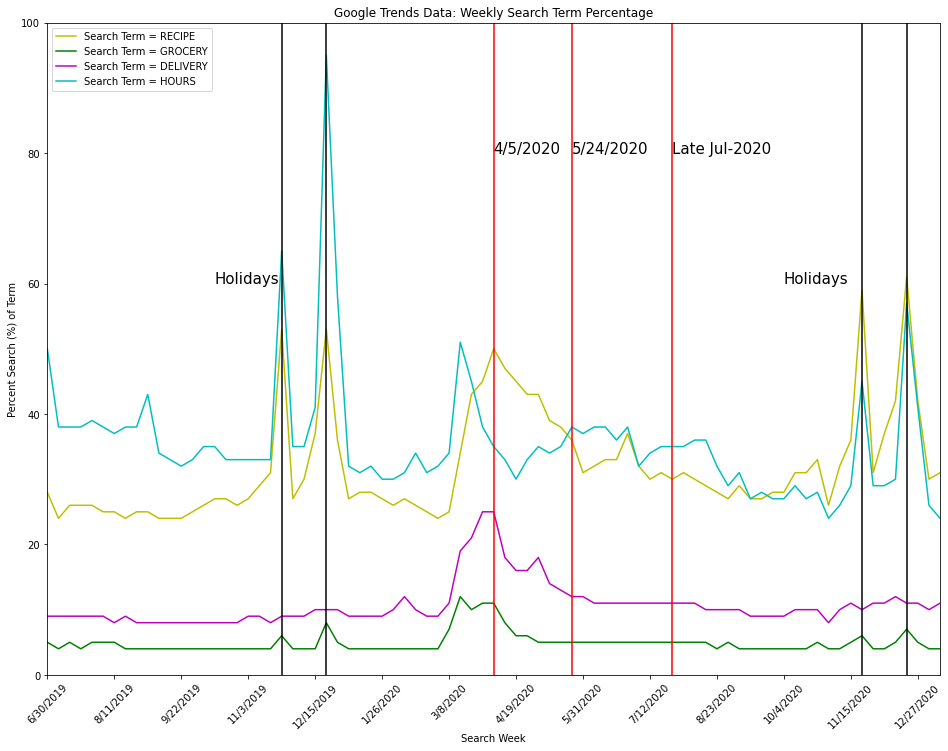

In [10]:
# plot of google trends data

# define variables
date = trends['Search Week']
recipe = trends['US search term: recipe (%)']
grocery = trends['US search term: grocery (%)']
delivery = trends['US search term: delivery (%)']
hours = trends['US search term: hours (%)']


# define figure and axes for adjustments
f = plt.figure() 
ax = plt.axes()

# plot and set line colors and types
recipe_handle = plt.plot(date, recipe, 'y', label='Search Term = RECIPE')
grocery_handle = plt.plot(date, grocery, 'g', label='Search Term = GROCERY')
delivery_handle = plt.plot(date, delivery, 'm', label='Search Term = DELIVERY')
hours_handle = plt.plot(date, hours, 'c', label='Search Term = HOURS')


# adjust tick marks so they are visible by rotating and only adding ~half of the total tick marks
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
#ax.yaxis.set_major_locator(plt.MaxNLocator(25))

# add labels
plt.xlabel("Search Week")
plt.title("Google Trends Data: Weekly Search Term Percentage")
plt.ylabel("Percent Search (%) of Term")

# adjust figure size
f.set_figwidth(16) 
f.set_figheight(12)

# indicate thanksgiving and christmas peaks with vertical lines
ax.axvline('11/24/2019', color='k')
ax.axvline('12/22/2019', color='k')
ax.axvline('11/22/2020', color='k')
ax.axvline('12/20/2020', color='k')

# add vertical lines at critical points and secondary hospitalization increase (late July)
ax.axvline('4/5/2020', color='red')
ax.axvline('7/26/2020', color='red')
ax.axvline('5/24/2020', color='red')

# annotate vertical lines
plt.annotate('Holidays',('10/13/2019',60),fontsize=15,color="black")
plt.annotate('Holidays',('10/4/2020',60),fontsize=15,color="black")
plt.annotate('4/5/2020',('4/5/2020',80),fontsize=15,color="black")
plt.annotate('Late Jul-2020',('7/26/2020',80),fontsize=15,color="black")
plt.annotate('5/24/2020',('5/24/2020',80),fontsize=15,color="black")

# add legend
plt.legend(loc="upper left")

# adjust axes
plt.xlim(['6/30/2019', '1/10/2021'])
plt.ylim([0, 100])

# save plt as .png
plt.savefig("Resources/plot_pngs/google_trends.png")

# show plot
plt.show()
